# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


606


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
print('Beginning Data Retrieval')
print('---------------------------')
counter = 0
for city in cities:
    print(f'Processing Record {counter} of set 1 | {city}')
    counter = counter + 1

Beginning Data Retrieval
---------------------------
Processing Record 0 of set 1 | ibra
Processing Record 1 of set 1 | ushuaia
Processing Record 2 of set 1 | nome
Processing Record 3 of set 1 | seoul
Processing Record 4 of set 1 | nanortalik
Processing Record 5 of set 1 | amderma
Processing Record 6 of set 1 | asfi
Processing Record 7 of set 1 | provideniya
Processing Record 8 of set 1 | kavaratti
Processing Record 9 of set 1 | khatanga
Processing Record 10 of set 1 | port blair
Processing Record 11 of set 1 | mendahara
Processing Record 12 of set 1 | yulara
Processing Record 13 of set 1 | puerto escondido
Processing Record 14 of set 1 | lompoc
Processing Record 15 of set 1 | okhotsk
Processing Record 16 of set 1 | aquidauana
Processing Record 17 of set 1 | mataura
Processing Record 18 of set 1 | balaipungut
Processing Record 19 of set 1 | mahebourg
Processing Record 20 of set 1 | simpang
Processing Record 21 of set 1 | bluff
Processing Record 22 of set 1 | jamestown
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
## Finding * Display the DataFrame

In [2]:
## Finding for one city
# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"

# # Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url
# target_city = 'phoenix'

# data = requests.get(query_url + target_city).json()
# print(query_url + target_city)

# data['coord']['lon']
# data['coord']['lat']
# data['main']['temp_max']
# data['main']['humidity']
# data['clouds']['all']
# data['wind']['speed']
# data['main']['temp_max']
# data['dt']
# data['sys']['country']
# data['name']


In [12]:
city1 = []
Lat = []
Long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date1 = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city1.append(response['name'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date1.append(response['dt'])
    except KeyError:
        print(f'Skipped City: {city}')

print(len(city1))
print(len(Lat))
print(len(Long))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date1))

### Creating a Datafram 
df = pd.DataFrame({'City': city1,
                   'Lat' : Lat,
                   'Lng' : Long,
                   'Max Temp': maxtemp,
                   'Humidity':humidity,
                   'Cloudiness':cloudiness,
                   'Wind Speed': windspeed,
                   'Country' : country,
                   'Date': date1
                  })




Skipped City: amderma
Skipped City: mendahara
Skipped City: illoqqortoormiut
Skipped City: saleaula
Skipped City: attawapiskat
Skipped City: taolanaro
Skipped City: bur gabo
Skipped City: sentyabrskiy
Skipped City: barentsburg
Skipped City: kamenskoye
Skipped City: grand centre
Skipped City: mys shmidta
Skipped City: tlahualilo
Skipped City: nizhneyansk
Skipped City: belushya guba
Skipped City: eldikan
Skipped City: dolbeau
Skipped City: tumannyy
Skipped City: karaul
Skipped City: kuanshan
Skipped City: tabiauea
Skipped City: ngukurr
Skipped City: parras
Skipped City: karakendzha
Skipped City: palabuhanratu
Skipped City: ituni
Skipped City: hendijan
Skipped City: kuche
Skipped City: vaitupu
Skipped City: dzhusaly
Skipped City: aflu
Skipped City: barbar
Skipped City: bolungarvik
Skipped City: utiroa
Skipped City: louisbourg
Skipped City: tikalaan
Skipped City: cape elizabeth
Skipped City: sug-aksy
Skipped City: samusu
Skipped City: andevoranto
Skipped City: talawdi
Skipped City: khonuu


In [13]:
# Export the city data into a .csv.
# Display the DataFrame

df.to_csv('../output_data/cities_t.csv', index=False)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ibrā’,22.6906,58.5334,78.57,37,100,2.80,OM,1618714021
1,Ushuaia,-54.8000,-68.3000,51.80,58,40,11.50,AR,1618713586
2,Nome,64.5011,-165.4064,33.80,75,1,6.91,US,1618713961
3,Seoul,37.5683,126.9778,55.40,44,20,11.50,KR,1618713954
4,Nanortalik,60.1432,-45.2371,25.16,53,0,25.41,GL,1618714021


In [14]:
# Describe
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,21.235598,23.486934,59.054549,68.321300,53.541516,7.869079,1.618714e+09
std,33.195754,91.267730,20.489992,23.119581,39.301992,5.695121,1.009152e+02
min,-54.800000,-175.200000,-10.050000,1.000000,0.000000,0.250000,1.618714e+09
25%,-7.167500,-56.284350,43.242500,55.000000,10.250000,3.452500,1.618714e+09
50%,26.506950,26.550000,62.600000,73.000000,60.000000,6.655000,1.618714e+09
75%,49.470725,108.168300,76.192500,87.000000,92.000000,10.360000,1.618714e+09
max,78.218600,179.316700,90.520000,100.000000,100.000000,34.050000,1.618714e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# Since the Max of Humidity is 100, No Humidity greater than 100 So this step Skipped
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,21.235598,23.486934,59.054549,68.321300,53.541516,7.869079,1.618714e+09
std,33.195754,91.267730,20.489992,23.119581,39.301992,5.695121,1.009152e+02
min,-54.800000,-175.200000,-10.050000,1.000000,0.000000,0.250000,1.618714e+09
25%,-7.167500,-56.284350,43.242500,55.000000,10.250000,3.452500,1.618714e+09
50%,26.506950,26.550000,62.600000,73.000000,60.000000,6.655000,1.618714e+09
75%,49.470725,108.168300,76.192500,87.000000,92.000000,10.360000,1.618714e+09
max,78.218600,179.316700,90.520000,100.000000,100.000000,34.050000,1.618714e+09


In [319]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ibrā’,22.6906,58.5334,78.57,37,100,2.80,OM,1618714021
1,Ushuaia,-54.8000,-68.3000,51.80,58,40,11.50,AR,1618713586
2,Nome,64.5011,-165.4064,33.80,75,1,6.91,US,1618713961
3,Seoul,37.5683,126.9778,55.40,44,20,11.50,KR,1618713954
4,Nanortalik,60.1432,-45.2371,25.16,53,0,25.41,GL,1618714021
...,...,...,...,...,...,...,...,...,...
549,Terrace Bay,48.7834,-87.1000,30.20,86,15,2.30,CA,1618714206
550,Porbandar,21.6422,69.6093,77.00,100,19,5.91,IN,1618714206
551,Ayan,56.4500,138.1667,28.04,89,98,4.27,RU,1618714207
552,Maragogi,-9.0122,-35.2225,76.21,83,92,2.68,BR,1618714207


In [29]:
###  Converting the Unix date format to yyyy-mm-dd and then spliting the column to separate date and time
# clean_city_data['Date'] = pd.to_datetime(clean_city_data['Date']).astype(str)
# # clean_city_data
# clean_city_data[['dte', 'Time']] = clean_city_data['Date'].str.split(' ', n=1, expand=True)
# clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

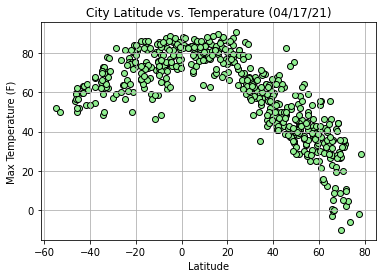

In [18]:
# dte1 = clean_city_data.iloc[0]['dte']
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Temperature (04/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

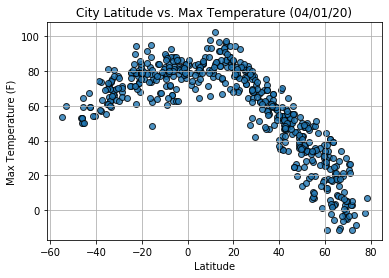

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

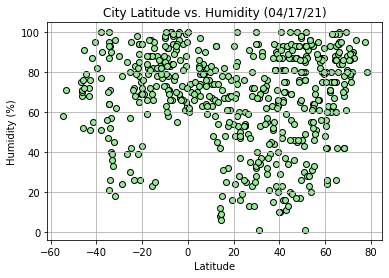

In [19]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Humidity (04/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

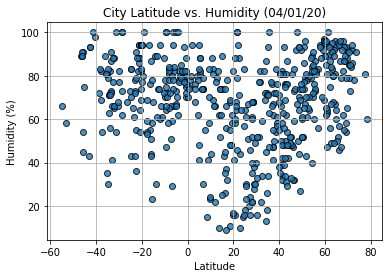

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

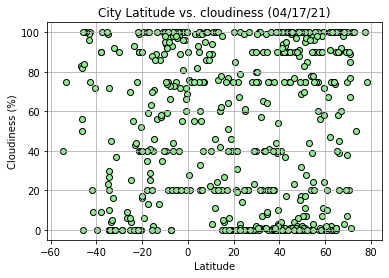

In [20]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. cloudiness (04/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

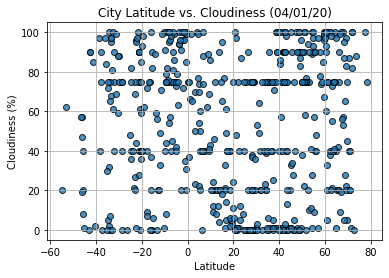

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (%)')

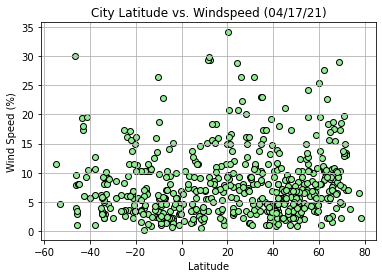

In [21]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Windspeed (04/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

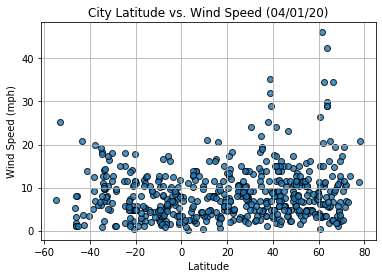

## Linear Regression

In [22]:
city_data_NH = clean_city_data[clean_city_data['Lat'] > 0]
city_data_NH

city_data_SH = clean_city_data[clean_city_data['Lat'] < 0]
city_data_SH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Ushuaia,-54.8000,-68.3000,51.80,58,40,11.50,AR,1618713586
10,Yulara,-25.2406,130.9889,69.80,30,0,17.27,AU,1618714024
14,Aquidauana,-20.4711,-55.7872,73.04,75,0,3.49,BR,1618714024
15,Mataura,-46.1927,168.8643,59.36,68,50,7.92,NZ,1618714025
17,Mahébourg,-20.4081,57.7000,75.20,94,40,3.44,MU,1618713726
...,...,...,...,...,...,...,...,...,...
535,Vredendal,-31.6683,18.5012,77.38,18,0,8.99,ZA,1618714200
541,Caravelas,-17.7125,-39.2481,73.45,84,35,5.30,BR,1618714203
542,Buala,-8.1450,159.5921,85.46,69,95,5.82,SB,1618714203
543,Comodoro Rivadavia,-45.8667,-67.5000,51.80,76,0,3.44,AR,1618714204


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Max temp and Latitude is -0.8821
The r-squared is: 0.7781858973976162


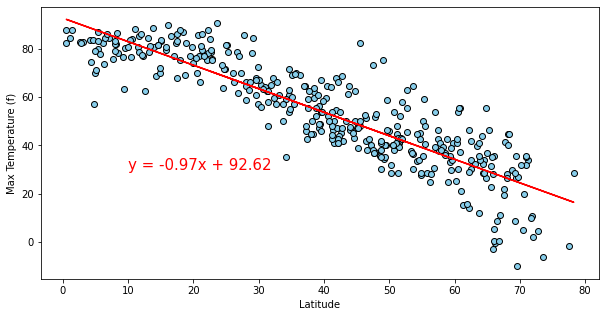

In [23]:

lati_NH = city_data_NH['Lat']
maxtemp_NH = city_data_NH['Max Temp']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, maxtemp_NH)
print(f'The correlation betwwen Northern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, maxtemp_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, maxtemp_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(10,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.46937863826630627


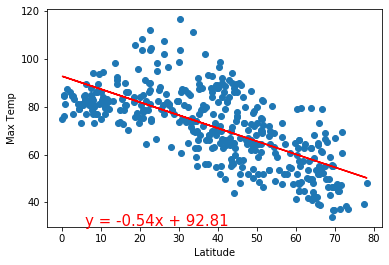

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Max temp and Latitude is 0.6098
The r-squared is: 0.3718440239682554


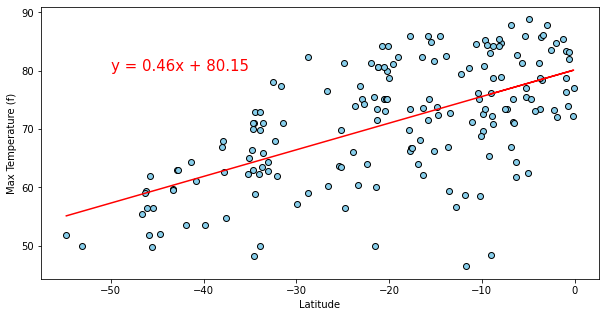

In [24]:
 
lati_SH = city_data_SH['Lat']
maxtemp_SH = city_data_SH['Max Temp']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, maxtemp_SH)
print(f'The correlation betwwen Southern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, maxtemp_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, maxtemp_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,80),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.6082708688906918


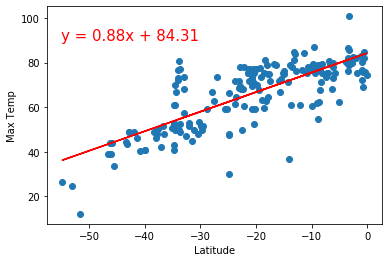

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Humidity and Latitude is 0.1933
The r-squared is: 0.03737718568607481


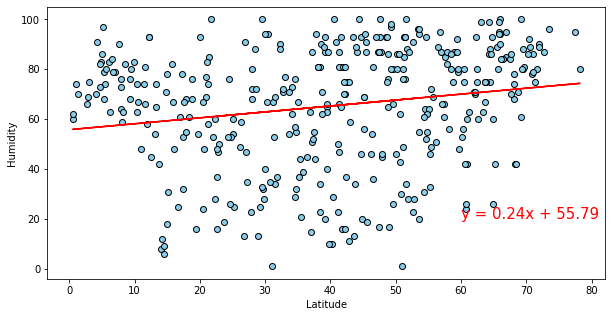

In [25]:

lati_NH = city_data_NH['Lat']
hum_NH = city_data_NH['Humidity']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, hum_NH)
print(f'The correlation betwwen Northern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, hum_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, hum_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(60,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.000543987878808455


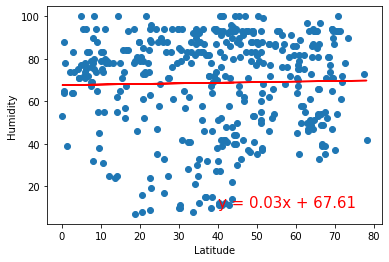

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Humidity and Latitude is 0.2858
The r-squared is: 0.08167993826044345


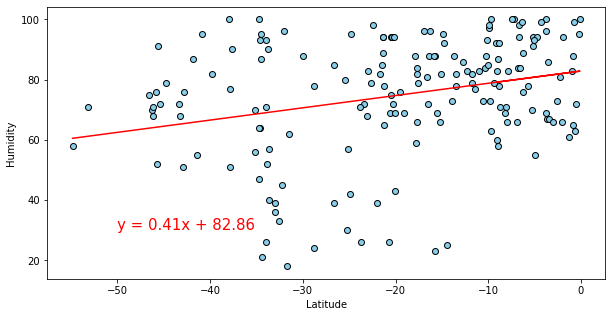

In [26]:
 
lati_SH = city_data_SH['Lat']
hum_SH = city_data_SH['Humidity']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, hum_SH)
print(f'The correlation betwwen Southern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, hum_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, hum_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity ')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.014985174297345524


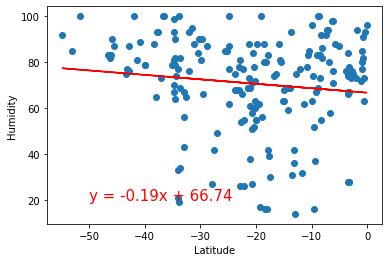

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Cloudiness and Latitude is 0.076
The r-squared is: 0.00577429506398418


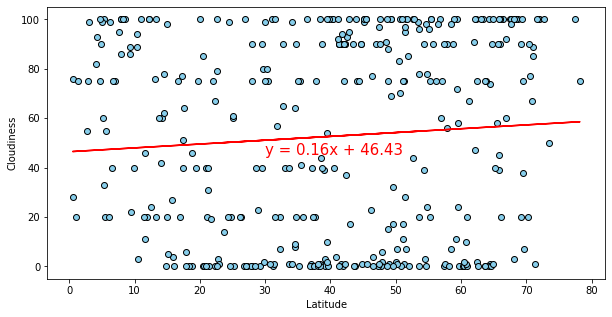

In [27]:

lati_NH = city_data_NH['Lat']
clo_NH = city_data_NH['Cloudiness']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, clo_NH)
print(f'The correlation betwwen Northern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, clo_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, clo_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(30,45),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0020898727664228514


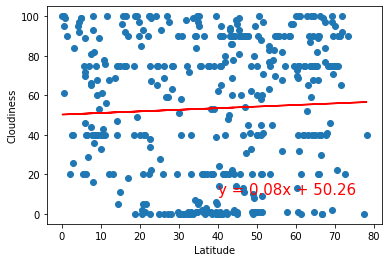

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Cloudiness and Latitude is 0.2563
The r-squared is: 0.06568627846972075


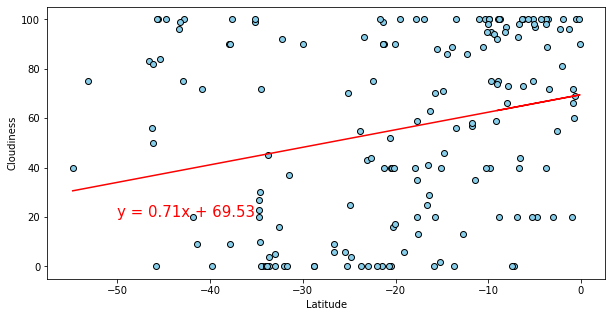

In [28]:
 
lati_SH = city_data_SH['Lat']
clo_SH = city_data_SH['Cloudiness']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, clo_SH)
print(f'The correlation betwwen Southern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, clo_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, clo_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0035263772085582894


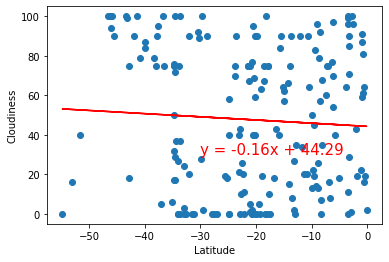

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Wind Speed and Latitude is 0.0075
The r-squared is: 5.632189517470222e-05


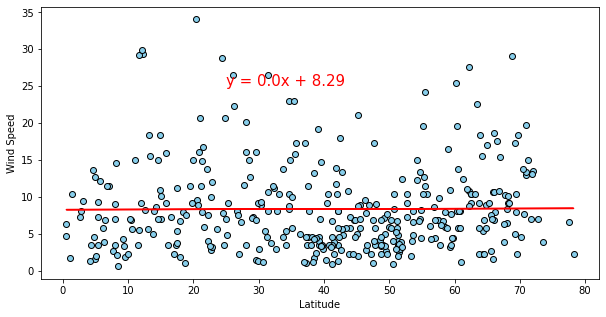

In [29]:

lati_NH = city_data_NH['Lat']
wind_NH = city_data_NH['Wind Speed']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, wind_NH)
print(f'The correlation betwwen Northern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, wind_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, wind_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(25,25),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.04019723576144484


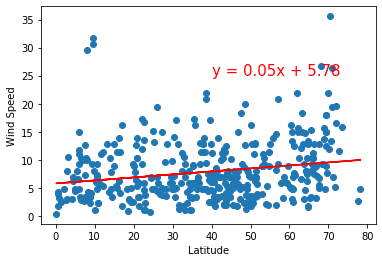

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Wind Speed and Latitude is -0.2022
The r-squared is: 0.04089617196129105


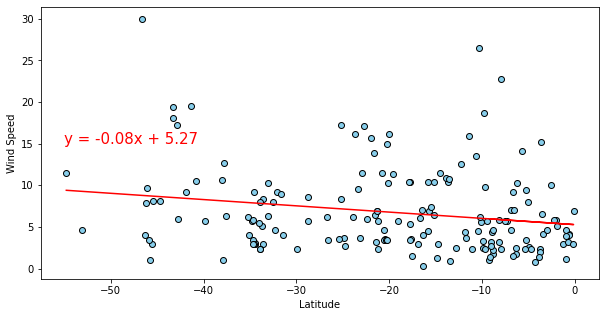

In [30]:

lati_SH = city_data_SH['Lat']
wind_SH = city_data_SH['Wind Speed']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, wind_SH)
print(f'The correlation betwwen Southern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, wind_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, wind_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-55,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.017128274759839232


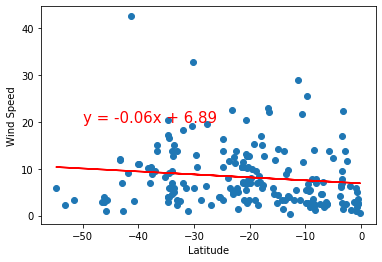